In [161]:
# Importing Libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib as mpl

In [162]:
# Generating synthetic data
X, y = make_blobs(
    n_samples=300,
    n_features=3,
    random_state=20
)

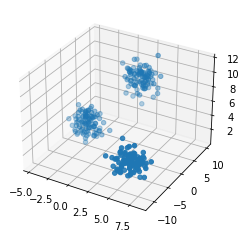

In [163]:
# Visualizing Data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2]);

In [164]:
# Preprocessing
X = MinMaxScaler().fit_transform(X)

In [165]:
K = 3 # Number of clusters
k = 2 # Reduced Dimensionality

In [166]:
# Applying PCA to reduce dimensions of data from 3D to 2D
m = X.shape[0]

sigma = (1/m) * np.dot(X.T, X)
U, S, V = np.linalg.svd(sigma)
U_reduce = U[:, 0:k]
z = np.dot(X, U_reduce) # (300x2) dimensions
X = z

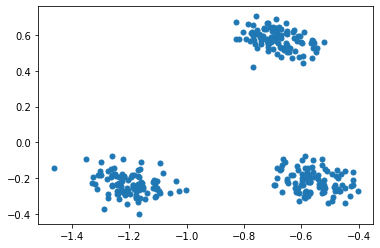

In [167]:
# Visualizing lower dimensional feature vector z
plt.scatter(X[:, 0], X[:, 1], marker='o', s=25)

In [168]:
# Randomly intialize cluster centroids
initial_centroids = np.zeros((K, k))

for i in range(K):
    initial_centroids[i] = np.random.permutation(X)[0]

In [169]:
initial_centroids

array([[-0.48531108, -0.25094195],
       [-0.5226933 , -0.20746745],
       [-1.23560754, -0.23642747]])

In [170]:
# Cluster assignment step
def cluster_assignment_step(X, centroids):
    m = X.shape[0]
    idx = np.zeros((m, 1))
    
    for i in range(m):
        c = []
        for x in range(K):
            distance = np.sqrt(sum(np.square(X[i] - centroids[x]))) ** 2
            c.append(distance)
        idx[i] = c.index(min(c))
        
    return idx

In [171]:
# Move centroids step
def move_centroid_step(X, idx):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for i in range(k+1):
        desc = [0, 0]
        for x in range(m):
            if (idx[x] == 0 and i == 0):
                desc[0] += X[x]
                desc[1] += 1
            elif (idx[x] == 1 and i == 1):
                desc[0] += X[x]
                desc[1] += 1
            elif (idx[x] == 2 and i == 2):
                desc[0] += X[x]
                desc[1] += 1

        centroids[i] = np.divide(desc[0], desc[1])

    return centroids

In [172]:
# Running the K-means algorithm
ITERATIONS = 30

idx_history = []
centroid_history = []
centroids = initial_centroids

for i in range(ITERATIONS):
    idx = cluster_assignment_step(X, centroids)
    centroids = move_centroid_step(X, idx)

    idx_history.append(idx)
    centroid_history.append(centroids)

In [173]:
print(f'Cluster centroids of converged K-means: {centroid_history[-1]}')

Cluster centroids of converged K-means: [[-0.55800603 -0.21895012]
 [-0.68736327  0.57682377]
 [-1.20136509 -0.23134345]]


In [174]:
def plotProgresskMeans(X, centroid_history, idx_history):
    cmap = plt.cm.rainbow
    norm = mpl.colors.Normalize(vmin=0, vmax=2)
    
    centroids_x = centroid_history[-1][:,0]
    centroids_y = centroid_history[-1][:,1]

    plt.scatter(X[:, 0], X[:, 1],
                   c=idx_history[-1],
                   cmap=cmap,
                   marker='o',
                   s=8**2,
                   linewidths=1,)
    
    plt.scatter(centroids_x,
                centroids_y,
                marker="x", 
                s=150,
                linewidths=5, 
                zorder=10, 
                c='black')

    
    plt.grid(False)
    plt.title('Iteration number %d' % (ITERATIONS))

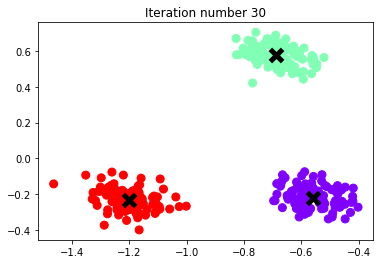

In [175]:
plotProgresskMeans(X, centroid_history, idx_history)